🔹 SVM MODEL RESULTS 🔹
Accuracy: 0.959

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Confusion Matrix:
 [[715  24]
 [ 18 278]]


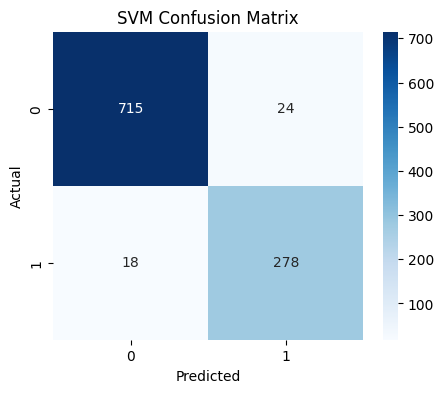


🔹 KNN MODEL RESULTS 🔹
Accuracy: 0.871

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       739
           1       0.76      0.79      0.78       296

    accuracy                           0.87      1035
   macro avg       0.84      0.85      0.84      1035
weighted avg       0.87      0.87      0.87      1035

Confusion Matrix:
 [[667  72]
 [ 62 234]]


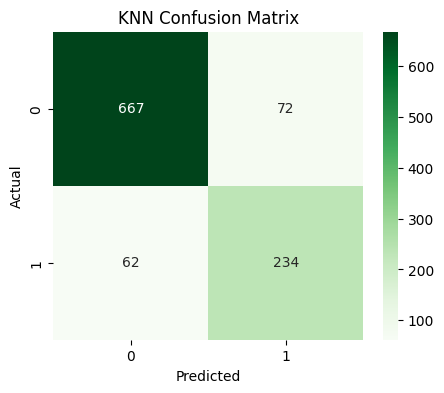

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("emails.csv")

# Drop unnecessary column
df = df.drop(columns=['Email No.'])

# Split features and target
X = df.drop(columns="Prediction")
y = df["Prediction"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=6)
svm = SVC(kernel='linear', gamma=0.7)

# Train models
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluation for SVM
print("🔹 SVM MODEL RESULTS 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

# Visualize SVM Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation for KNN
print("\n🔹 KNN MODEL RESULTS 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

# Visualize KNN Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
